<a href="https://colab.research.google.com/github/Arminsbss/tumor-classification/blob/main/tumor_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/MyDrive/Colab Notebooks/tumor dataset

/content/drive/MyDrive/Colab Notebooks/tumor dataset


In [ ]:
import numpy as np
import keras
from keras.preprocessing import image
from keras.applications import vgg16

In [ ]:
img = image.load_img("N (1).jpg")

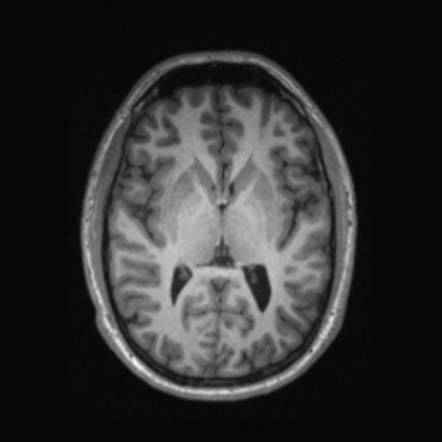

In [ ]:
display(img)

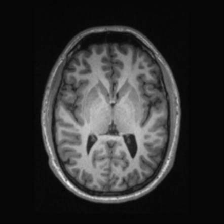

In [ ]:
img = image.load_img("N (1).jpg", target_size=(224, 224))
display(img)

In [ ]:
from numpy.lib.function_base import append
from keras.applications.vgg16 import preprocess_input
tumor_no=[]
tumor_yes=[]
target=[]
for i in range(98):
  img = image.load_img("N ("+str(i+1)+").jpg")
  img = image.load_img("N ("+str(i+1)+").jpg", target_size=(224, 224))
  img=np.array(img)
  # prepare the image for the VGG model
  tumor_no.append(img)
  target.append(0)
for i in range(155):
  img = image.load_img("Y ("+str(i+1)+").jpg")
  img = image.load_img("Y ("+str(i+1)+").jpg", target_size=(224, 224))
  img=np.array(img)
  # prepare the image for the VGG model
  tumor_yes.append(img)
  target.append(1)
All_data=[]
All_data=tumor_no+tumor_yes
# for i in range(252):
#   All_data.insert(i,target[i])
print(len(tumor_no))
print(len(tumor_yes))
All_data1=np.array(All_data)
target1=np.array(target)

98
155


In [ ]:
print(target1[252])

1


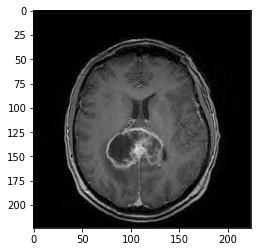

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(All_data1[252])

In [ ]:
from sklearn.utils import shuffle
All_data1, target1 = shuffle(All_data1, target1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(All_data1, target1, test_size=0.33)

In [ ]:
print(y_train[120])

1


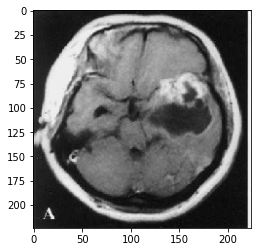

In [ ]:
plt.imshow(X_train[120])

In [ ]:
#split train and test
train = All_data1[:-50]
test = All_data1[-50:]
train_lable = np.array(target1[:-50])
test_lable = np.array(target1[-50:])

In [ ]:
# for i in range(252):
#   All_data.insert(i,target[i])
# print(All_data[0])

In [ ]:
from keras.applications.vgg16 import VGG16
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense, Activation
import tensorflow as tf
keras.backend.clear_session()
modelVGG = VGG16(weights='imagenet',include_top=False, input_shape=(224, 224, 3))
# modelVGG.layers.pop()
modelVGG.trainable=False
model = Sequential()
model.add (modelVGG)
model.add (keras.layers.Flatten())
# keras.layers.Dropout(rate=0.1)

model.add (keras.layers.Dense(2,activation='relu'))
model.add (keras.layers.Dense(5, activation='relu'))
model.add (keras.layers.Dense(1,activation='sigmoid'))
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
# model.compile(optimizer="rmsprop", loss="sparse_categorical_crossentropy")

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 2)                 50178     
                                                                 
 dense_1 (Dense)             (None, 5)                 15        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 14,764,887
Trainable params: 50,199
Non-trainable params: 14,714,688
_________________________________________________________________
None


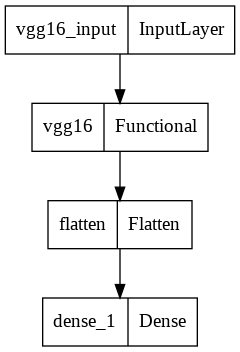

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='vgg.png')

In [ ]:
checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath="presentOne",
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)
EarlyStop=tf.keras.callbacks.EarlyStopping(
    monitor="accuracy",
    patience=10)
history=model.fit(x=X_train, y=y_train, epochs=20,batch_size=32,validation_data=(X_test,y_test),callbacks=[checkpoint,EarlyStop])
# history = model.fit(x=X_train,y=y_train, 
#                                epochs=20,
#                               batch_size=32,
#                                validation_data=(X_test,y_test), callbacks=[checkpoint,EarlyStop])

Epoch 1/20
6/6 [==============================] - 6s 921ms/step - loss: 0.7198 - accuracy: 0.7219 - val_loss: 0.5629 - val_accuracy: 0.7143
Epoch 2/20
6/6 [==============================] - 4s 805ms/step - loss: 0.4451 - accuracy: 0.8047 - val_loss: 0.5248 - val_accuracy: 0.8214
Epoch 3/20
6/6 [==============================] - 4s 789ms/step - loss: 0.3752 - accuracy: 0.9231 - val_loss: 0.5028 - val_accuracy: 0.8452
Epoch 4/20
6/6 [==============================] - 1s 216ms/step - loss: 0.3374 - accuracy: 0.9349 - val_loss: 0.5402 - val_accuracy: 0.8333
Epoch 5/20
6/6 [==============================] - 2s 426ms/step - loss: 0.2853 - accuracy: 0.9586 - val_loss: 0.5521 - val_accuracy: 0.8452
Epoch 6/20
6/6 [==============================] - 4s 775ms/step - loss: 0.2713 - accuracy: 0.9822 - val_loss: 0.5343 - val_accuracy: 0.8690
Epoch 7/20
6/6 [==============================] - 2s 448ms/step - loss: 0.2583 - accuracy: 0.9882 - val_loss: 0.6181 - val_accuracy: 0.8571
Epoch 8/20
6/6 [====

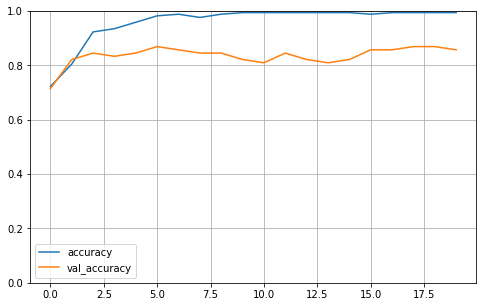

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame ( history.history ).drop(columns=['loss','val_loss']).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show
plt.savefig(r'presentOne.png', dpi=300)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import load_model
temp = load_model ('presentOne')
print('acc: ', temp.evaluate(X_test,y_test))

predictions = temp.predict_generator(X_test, steps=len(X_test))

3/3 [==============================] - 1s 137ms/step - loss: 0.5343 - accuracy: 0.8690
acc:  [0.53428715467453, 0.8690476417541504]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  


scores: 


In [ ]:
print('scores: ')
def rounder(a):
    k=[]
    for t in range(0,len(a)):
       a[t][0]=round(a[t][0])
    return np.array(a)
y=rounder(predictions)

report = classification_report (y_true= y_test, y_pred=y.reshape(84))
print(report)

scores: 
              precision    recall  f1-score   support

           0       0.96      0.73      0.83        37
           1       0.82      0.98      0.89        47

    accuracy                           0.87        84
   macro avg       0.89      0.85      0.86        84
weighted avg       0.88      0.87      0.87        84



# **Image augumentation**

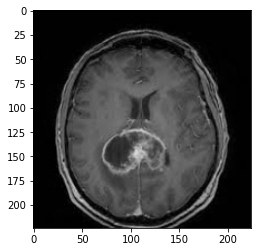

In [ ]:
import matplotlib.pyplot as plt
image = plt.imread("Y (2).jpg")
plt.imshow(image)

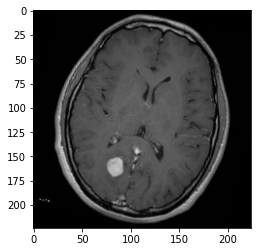

In [ ]:
import cv2
import glob
images=glob.glob("*.jpg")
for image_path in images:
  image=cv2.imread(image_path)
plt.imshow(image)
# cv2.imwrite('savedimage.png', image)    

In [ ]:
import imgaug.augmenters as iaa
# 2. Image Augmentation
# augmentation = iaa.Sequential([
augmentation = iaa.Fliplr(0.5)
# ])

In [ ]:
# 3. Show Images
augmented_images = augmentation(images=X_train)

In [ ]:
print(y_train)

[0 1 1 1 0 1 0 1 0 1 1 1 1 1 0 0 0 1 1 1 1 0 1 1 0 0 0 1 0 1 1 1 0 1 0 1 1
 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 0 1 0
 1 0 0 1 0 0 1 0 0 0 1 1 0 1 1 0 1 1 1 0 0 0 1 1 0 0 1 1 1 1 1 1 1 0 1 0 1
 1 1 1 1 0 0 1 1 1 1 0 1 1 0 1 0 0 0 0 0 0 0 1 1 0 1 1 1 0 1 0 0 1 0 1 0 1
 1 1 0 1 1 1 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1]


In [ ]:
#save images
#flip horizontally
i=0
for img in augmented_images:
  if y_train[i]==0:
    cv2.imwrite('NN ('+str(i)+').jpg', img)
  else:
    cv2.imwrite('YY ('+str(i)+').jpg', img)
  i+=1


In [ ]:
#flip vertically
augmentation = iaa.Flipud(0.5)
augmented_images = augmentation(images=X_train)
i=0
for img in augmented_images:
  if y_train[i]==0:
    cv2.imwrite('NN ('+str(i+170)+').jpg', img)
  else:
    cv2.imwrite('YY ('+str(i+170)+').jpg', img)
  i+=1

In [ ]:
#rotate 30degrees to right
augmentation = iaa.Affine(rotate=(-30,30))
augmented_images = augmentation(images=X_train)
i=0
for img in augmented_images:
  if y_train[i]==0:
    cv2.imwrite('NN ('+str(i+340)+').jpg', img)
  else:
    cv2.imwrite('YY ('+str(i+340)+').jpg', img)
  i+=1

In [ ]:
#rotate 30degrees to left
augmentation = iaa.Affine(rotate=(-30,0))
augmented_images = augmentation(images=X_train)
i=0
for img in augmented_images:
  if y_train[i]==0:
    cv2.imwrite('NN ('+str(i+510)+').jpg', img)
  else:
    cv2.imwrite('YY ('+str(i+510)+').jpg', img)
  i+=1

In [ ]:
#darken images randomely
augmentation = iaa.Add((-40, -35))
augmented_images = augmentation(images=X_train)
i=0
for img in augmented_images:
  if y_train[i]==0:
    cv2.imwrite('NN ('+str(i+680)+').jpg', img)
  else:
    cv2.imwrite('YY ('+str(i+680)+').jpg', img)
  i+=1

In [ ]:
#blur images
augmentation = iaa.GaussianBlur(sigma=(0.0, 5.0))
augmented_images = augmentation(images=X_train)
i=0
for img in augmented_images:
  if y_train[i]==0:
    cv2.imwrite('NN ('+str(i+850)+').jpg', img)
  else:
    cv2.imwrite('YY ('+str(i+850)+').jpg', img)
  i+=1

In [ ]:
#brighten images
augmentation = iaa.MultiplyBrightness((1.2, 1.5))
augmented_images = augmentation(images=X_train)
i=0
for img in augmented_images:
  if y_train[i]==0:
    cv2.imwrite('NN ('+str(i+1020)+').jpg', img)
  else:
    cv2.imwrite('YY ('+str(i+1020)+').jpg', img)
  i+=1

In [ ]:
#high contrast images
augmentation = iaa.GammaContrast((1.5, 2.0))
augmented_images = augmentation(images=X_train)
i=0
for img in augmented_images:
  if y_train[i]==0:
    cv2.imwrite('NN ('+str(i+1190)+').jpg', img)
  else:
    cv2.imwrite('YY ('+str(i+1190)+').jpg', img)
  i+=1

In [ ]:
#high scale images
augmentation = iaa.Affine(scale=(1.1, 1.3))
augmented_images = augmentation(images=X_train)
i=0
for img in augmented_images:
  if y_train[i]==0:
    cv2.imwrite('NN ('+str(i+1360)+').jpg', img)
  else:
    cv2.imwrite('YY ('+str(i+1360)+').jpg', img)
  i+=1

In [ ]:
#high scale images
augmentation = iaa.Affine(scale=(1.1, 1.3))
augmented_images = augmentation(images=X_train)
i=0
for img in augmented_images:
  if y_train[i]==0:
    cv2.imwrite('NN ('+str(i+1530)+').jpg', img)
  else:
    cv2.imwrite('YY ('+str(i+1530)+').jpg', img)
  i+=1

In [ ]:
from numpy.lib.function_base import append
import numpy as np
import keras
from keras.preprocessing import image
from keras.applications import vgg16
tumor_no=[]
tumor_yes=[]
y_train_ag=[]
for i in range(1,157):
  img = image.load_img("NNN ("+str(i)+").jpg", target_size=(224, 224))
  img=np.array(img)
  # prepare the image for the VGG model
  tumor_no.append(img)
  y_train_ag.append(0)
for i in range(1,309):
  img = image.load_img("YYY ("+str(i)+").jpg", target_size=(224, 224))
  img=np.array(img)
  # prepare the image for the VGG model
  tumor_yes.append(img)
  y_train_ag.append(1)
X_train_ag=[]
X_train_ag=tumor_no+tumor_yes
# for i in range(252):
#   All_data.insert(i,target[i])
print(len(tumor_no))
print(len(tumor_yes))
X_train_ag1=np.array(X_train_ag)
y_train_ag1=np.array(y_train_ag)

156
308


In [ ]:
from keras.applications.vgg16 import VGG16
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense, Activation
import tensorflow as tf
keras.backend.clear_session()
modelVGG = VGG16(weights='imagenet',include_top=False, input_shape=(224, 224, 3))
# modelVGG.layers.pop()
modelVGG.trainable=False
model = Sequential()
model.add (modelVGG)
model.add (keras.layers.Flatten())
# keras.layers.Dropout(rate=0.1)

model.add (keras.layers.Dense(2,activation='relu'))
model.add (keras.layers.Dense(5, activation='relu'))
model.add (keras.layers.Dense(1,activation='sigmoid'))
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
# model.compile(optimizer="rmsprop", loss="sparse_categorical_crossentropy")

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 2)                 50178     
                                                                 
 dense_1 (Dense)             (None, 5)                 15        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 14,764,887
Trainable params: 50,199
Non-trainable params: 14,714,688
_________________________________________________________________
None


In [ ]:
checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath="presentOne",
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)
EarlyStop=tf.keras.callbacks.EarlyStopping(
    monitor="accuracy",
    patience=10)
history=model.fit(x=X_train_ag1, y=y_train_ag1, epochs=30,batch_size=32,validation_data=(X_test,y_test),callbacks=[checkpoint,EarlyStop])


Epoch 1/30
15/15 [==============================] - ETA: 0s - loss: 0.5754 - accuracy: 0.7220WARNING:tensorflow:5 out of the last 13 calls to <function Model.make_test_function.<locals>.test_function at 0x7f6968101e60> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.


INFO:tensorflow:Assets written to: presentOne/assets


INFO:tensorflow:Assets written to: presentOne/assets


15/15 [==============================] - 10s 614ms/step - loss: 0.5754 - accuracy: 0.7220 - val_loss: 0.5179 - val_accuracy: 0.8214
Epoch 2/30
15/15 [==============================] - 3s 230ms/step - loss: 0.3683 - accuracy: 0.8815 - val_loss: 0.5529 - val_accuracy: 0.7976
Epoch 3/30
15/15 [==============================] - 5s 331ms/step - loss: 0.3011 - accuracy: 0.9332 - val_loss: 0.5295 - val_accuracy: 0.8095
Epoch 4/30
15/15 [==============================] - 4s 255ms/step - loss: 0.2697 - accuracy: 0.9526 - val_loss: 0.5390 - val_accuracy: 0.8095
Epoch 5/30
15/15 [==============================] - ETA: 0s - loss: 0.2494 - accuracy: 0.9720INFO:tensorflow:Assets written to: presentOne/assets


INFO:tensorflow:Assets written to: presentOne/assets


15/15 [==============================] - 8s 537ms/step - loss: 0.2494 - accuracy: 0.9720 - val_loss: 0.5227 - val_accuracy: 0.8452
Epoch 6/30
15/15 [==============================] - 6s 405ms/step - loss: 0.2384 - accuracy: 0.9871 - val_loss: 0.5955 - val_accuracy: 0.7738
Epoch 7/30
15/15 [==============================] - 3s 222ms/step - loss: 0.2280 - accuracy: 0.9871 - val_loss: 0.5808 - val_accuracy: 0.8214
Epoch 8/30
15/15 [==============================] - 3s 234ms/step - loss: 0.2234 - accuracy: 0.9978 - val_loss: 0.6485 - val_accuracy: 0.7857
Epoch 9/30
15/15 [==============================] - 5s 325ms/step - loss: 0.2197 - accuracy: 1.0000 - val_loss: 0.6228 - val_accuracy: 0.7976
Epoch 10/30
15/15 [==============================] - 4s 308ms/step - loss: 0.2166 - accuracy: 0.9978 - val_loss: 0.6546 - val_accuracy: 0.7857
Epoch 11/30
15/15 [==============================] - 3s 185ms/step - loss: 0.2139 - accuracy: 0.9957 - val_loss: 0.6726 - val_accuracy: 0.7738
Epoch 12/30
15/

INFO:tensorflow:Assets written to: presentOne/assets


15/15 [==============================] - 6s 437ms/step - loss: 0.1996 - accuracy: 1.0000 - val_loss: 0.6163 - val_accuracy: 0.8571
Epoch 18/30
15/15 [==============================] - 3s 220ms/step - loss: 0.1972 - accuracy: 1.0000 - val_loss: 0.7133 - val_accuracy: 0.8095
Epoch 19/30
15/15 [==============================] - 4s 292ms/step - loss: 0.1947 - accuracy: 1.0000 - val_loss: 0.6830 - val_accuracy: 0.8214


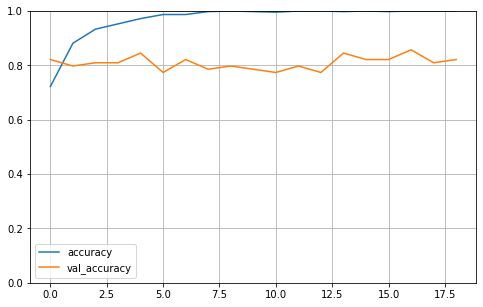

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame ( history.history ).drop(columns=['loss','val_loss']).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show
plt.savefig(r'presentOne.png', dpi=300)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import load_model
temp = load_model ('presentOne')
print('acc: ', temp.evaluate(X_test,y_test))

predictions = temp.predict_generator(X_test, steps=len(X_test))
print('scores: ')
y=rounder(predictions)
report = classification_report (y_true= y_test, y_pred=y.reshape(84))
print(report)

3/3 [==============================] - 1s 129ms/step - loss: 0.6163 - accuracy: 0.8571
acc:  [0.6163385510444641, 0.8571428656578064]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  


scores: 
              precision    recall  f1-score   support

           0       0.96      0.70      0.81        37
           1       0.81      0.98      0.88        47

    accuracy                           0.86        84
   macro avg       0.88      0.84      0.85        84
weighted avg       0.88      0.86      0.85        84



In [ ]:
history=model.fit(x=X_train_ag1, y=y_train_ag1, epochs=20,batch_size=12,validation_data=(X_test,y_test),callbacks=[checkpoint,EarlyStop])

Epoch 1/20
39/39 [==============================] - 8s 199ms/step - loss: 0.1912 - accuracy: 1.0000 - val_loss: 0.5772 - val_accuracy: 0.8571
Epoch 2/20
39/39 [==============================] - 5s 142ms/step - loss: 0.1865 - accuracy: 1.0000 - val_loss: 0.5357 - val_accuracy: 0.8452
Epoch 3/20
39/39 [==============================] - ETA: 0s - loss: 0.1819 - accuracy: 0.9978INFO:tensorflow:Assets written to: presentOne/assets


INFO:tensorflow:Assets written to: presentOne/assets


39/39 [==============================] - 7s 194ms/step - loss: 0.1819 - accuracy: 0.9978 - val_loss: 0.4750 - val_accuracy: 0.8810
Epoch 4/20
39/39 [==============================] - 5s 118ms/step - loss: 0.1768 - accuracy: 1.0000 - val_loss: 0.6902 - val_accuracy: 0.8452
Epoch 5/20
39/39 [==============================] - ETA: 0s - loss: 0.1723 - accuracy: 1.0000INFO:tensorflow:Assets written to: presentOne/assets


INFO:tensorflow:Assets written to: presentOne/assets


39/39 [==============================] - 10s 270ms/step - loss: 0.1723 - accuracy: 1.0000 - val_loss: 0.5515 - val_accuracy: 0.8929
Epoch 6/20
39/39 [==============================] - 4s 114ms/step - loss: 0.1667 - accuracy: 1.0000 - val_loss: 0.5582 - val_accuracy: 0.8810
Epoch 7/20
39/39 [==============================] - 5s 118ms/step - loss: 0.1620 - accuracy: 1.0000 - val_loss: 0.5392 - val_accuracy: 0.8929
Epoch 8/20
39/39 [==============================] - 6s 156ms/step - loss: 0.1580 - accuracy: 1.0000 - val_loss: 0.5821 - val_accuracy: 0.8810
Epoch 9/20
39/39 [==============================] - 6s 144ms/step - loss: 0.1537 - accuracy: 1.0000 - val_loss: 0.6455 - val_accuracy: 0.8810
Epoch 10/20
39/39 [==============================] - 5s 120ms/step - loss: 0.1497 - accuracy: 1.0000 - val_loss: 0.6829 - val_accuracy: 0.8690
Epoch 11/20
39/39 [==============================] - 6s 144ms/step - loss: 0.1461 - accuracy: 1.0000 - val_loss: 0.5082 - val_accuracy: 0.8929


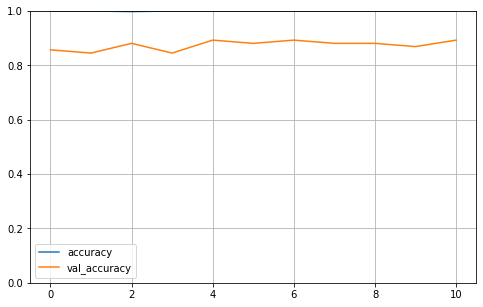

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame ( history.history ).drop(columns=['loss','val_loss']).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show
plt.savefig(r'presentOne.png', dpi=300)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import load_model
temp = load_model ('presentOne')
print('acc: ', temp.evaluate(X_test,y_test))

predictions = temp.predict_generator(X_test, steps=len(X_test))
print('scores: ')
y=rounder(predictions)
report = classification_report (y_true= y_test, y_pred=y.reshape(84))
print(report)

3/3 [==============================] - 2s 798ms/step - loss: 0.5515 - accuracy: 0.8929
acc:  [0.5515393018722534, 0.8928571343421936]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  


scores: 
              precision    recall  f1-score   support

           0       0.97      0.78      0.87        37
           1       0.85      0.98      0.91        47

    accuracy                           0.89        84
   macro avg       0.91      0.88      0.89        84
weighted avg       0.90      0.89      0.89        84



In [ ]:
history=model.fit(x=X_train_ag1, y=y_train_ag1, epochs=10,batch_size=8,validation_data=(X_test,y_test),callbacks=[checkpoint,EarlyStop])

Epoch 1/10
58/58 [==============================] - 8s 135ms/step - loss: 0.1415 - accuracy: 1.0000 - val_loss: 0.6502 - val_accuracy: 0.8810
Epoch 2/10
58/58 [==============================] - 6s 102ms/step - loss: 0.1361 - accuracy: 1.0000 - val_loss: 0.6990 - val_accuracy: 0.8810
Epoch 3/10
58/58 [==============================] - ETA: 0s - loss: 0.1318 - accuracy: 1.0000INFO:tensorflow:Assets written to: presentOne/assets


INFO:tensorflow:Assets written to: presentOne/assets


58/58 [==============================] - 8s 144ms/step - loss: 0.1318 - accuracy: 1.0000 - val_loss: 0.4871 - val_accuracy: 0.9048
Epoch 4/10
58/58 [==============================] - 6s 100ms/step - loss: 0.1274 - accuracy: 1.0000 - val_loss: 0.6079 - val_accuracy: 0.8690
Epoch 5/10
58/58 [==============================] - 5s 80ms/step - loss: 0.1219 - accuracy: 1.0000 - val_loss: 0.6643 - val_accuracy: 0.8571
Epoch 6/10
58/58 [==============================] - 4s 77ms/step - loss: 0.1175 - accuracy: 1.0000 - val_loss: 0.7018 - val_accuracy: 0.8571
Epoch 7/10
58/58 [==============================] - ETA: 0s - loss: 0.1134 - accuracy: 1.0000INFO:tensorflow:Assets written to: presentOne/assets


INFO:tensorflow:Assets written to: presentOne/assets


58/58 [==============================] - 9s 151ms/step - loss: 0.1134 - accuracy: 1.0000 - val_loss: 0.4756 - val_accuracy: 0.9167
Epoch 8/10
58/58 [==============================] - 6s 108ms/step - loss: 0.1152 - accuracy: 0.9957 - val_loss: 0.6701 - val_accuracy: 0.8810
Epoch 9/10
58/58 [==============================] - ETA: 0s - loss: 0.1230 - accuracy: 0.9957INFO:tensorflow:Assets written to: presentOne/assets


INFO:tensorflow:Assets written to: presentOne/assets


58/58 [==============================] - 9s 149ms/step - loss: 0.1230 - accuracy: 0.9957 - val_loss: 0.4638 - val_accuracy: 0.9286
Epoch 10/10
58/58 [==============================] - 5s 85ms/step - loss: 0.1037 - accuracy: 1.0000 - val_loss: 0.4455 - val_accuracy: 0.9286


In [ ]:
history=model.fit(x=X_train_ag1, y=y_train_ag1, epochs=10,batch_size=1,validation_data=(X_test,y_test),callbacks=[checkpoint,EarlyStop])

Epoch 1/10
464/464 [==============================] - 12s 24ms/step - loss: 0.4053 - accuracy: 0.7953 - val_loss: 0.9460 - val_accuracy: 0.7500
Epoch 2/10
464/464 [==============================] - 9s 20ms/step - loss: 0.2130 - accuracy: 0.9483 - val_loss: 0.7351 - val_accuracy: 0.8452
Epoch 3/10
464/464 [==============================] - 10s 21ms/step - loss: 0.1247 - accuracy: 0.9828 - val_loss: 0.8016 - val_accuracy: 0.8810
Epoch 4/10
464/464 [==============================] - 9s 18ms/step - loss: 0.0949 - accuracy: 0.9914 - val_loss: 0.7810 - val_accuracy: 0.8810
Epoch 5/10
464/464 [==============================] - 11s 24ms/step - loss: 0.0829 - accuracy: 0.9935 - val_loss: 0.7538 - val_accuracy: 0.8571
Epoch 6/10
464/464 [==============================] - 11s 24ms/step - loss: 0.0743 - accuracy: 0.9935 - val_loss: 0.8799 - val_accuracy: 0.8810
Epoch 7/10
464/464 [==============================] - 11s 23ms/step - loss: 0.0643 - accuracy: 0.9935 - val_loss: 0.7599 - val_accuracy: 0

In [ ]:
history=model.fit(x=X_train_ag1, y=y_train_ag1, epochs=10,batch_size=8,validation_data=(X_test,y_test),callbacks=[checkpoint,EarlyStop])

Epoch 1/10
58/58 [==============================] - 10s 172ms/step - loss: 0.0320 - accuracy: 1.0000 - val_loss: 0.8042 - val_accuracy: 0.8929
Epoch 2/10
58/58 [==============================] - 7s 123ms/step - loss: 0.0313 - accuracy: 1.0000 - val_loss: 0.8103 - val_accuracy: 0.8929
Epoch 3/10
58/58 [==============================] - 6s 96ms/step - loss: 0.0307 - accuracy: 1.0000 - val_loss: 0.8165 - val_accuracy: 0.8929
Epoch 4/10
58/58 [==============================] - 6s 111ms/step - loss: 0.0301 - accuracy: 1.0000 - val_loss: 0.8218 - val_accuracy: 0.8929
Epoch 5/10
58/58 [==============================] - 7s 123ms/step - loss: 0.0295 - accuracy: 1.0000 - val_loss: 0.8269 - val_accuracy: 0.8929
Epoch 6/10
58/58 [==============================] - 6s 97ms/step - loss: 0.0290 - accuracy: 1.0000 - val_loss: 0.8318 - val_accuracy: 0.8929
Epoch 7/10
58/58 [==============================] - 6s 113ms/step - loss: 0.0284 - accuracy: 1.0000 - val_loss: 0.8373 - val_accuracy: 0.8929
Epoch 8

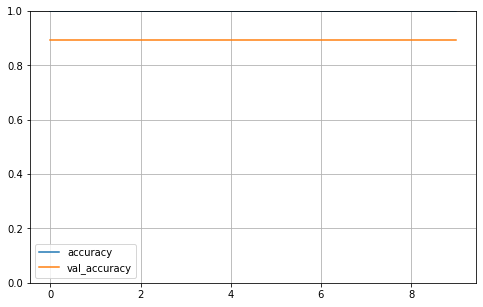

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame ( history.history ).drop(columns=['loss','val_loss']).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show
plt.savefig(r'presentOne.png', dpi=300)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import load_model
temp = load_model ('presentOne')
print('acc: ', temp.evaluate(X_test,y_test))

predictions = temp.predict_generator(X_test, steps=len(X_test))
print('scores: ')
y=rounder(predictions)
report = classification_report (y_true= y_test, y_pred=y.reshape(84))
print(report)

3/3 [==============================] - 2s 692ms/step - loss: 0.4638 - accuracy: 0.9286
acc:  [0.46378153562545776, 0.9285714030265808]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  


scores: 
              precision    recall  f1-score   support

           0       0.94      0.89      0.92        37
           1       0.92      0.96      0.94        47

    accuracy                           0.93        84
   macro avg       0.93      0.92      0.93        84
weighted avg       0.93      0.93      0.93        84

